In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv("epl_matches_train.csv")
test=pd.read_csv("epl_matches_test.csv")

train

,season,stage,date,match_id,home_team_id,away_team_id,home_player_X1,home_player_X2,home_player_X3,home_player_X4,...,red_card_home_team,red_card_away_team,crosses_home_team,crosses_away_team,corner_home_team,corner_away_team,possession_home_team,possession_away_team,home_team_goal,away_team_goal
0,2008/2009,1,2008-08-17 00:00:00,49337,10260,10261,1,2,4,6,...,0,0,24,9,6,6,55.0,45.0,1,1
1,2008/2009,1,2008-08-16 00:00:00,38136,9825,8659,1,2,4,6,...,0,0,21,7,7,5,66.0,34.0,1,0
2,2008/2009,1,2008-08-16 00:00:00,43276,8472,8650,1,2,4,6,...,0,0,15,19,1,8,46.0,54.0,0,1
3,2008/2009,1,2008-08-16 00:00:00,40671,8654,8528,1,2,4,6,...,0,0,15,27,6,10,52.0,48.0,2,1
4,2008/2009,1,2008-08-17 00:00:00,34633,10252,8456,1,2,4,6,...,0,0,16,16,7,8,52.0,48.0,4,2
5,2008/2009,1,2008-08-16 00:00:00,45612,8668,8655,1,2,4,6,...,0,0,14,21,3,4,51.0,49.0,2,3
6,2008/2009,1,2008-08-16 00:00:00,41842,8549,8586,1,2,4,6,...,0,0,25,27,7,9,53.0,47.0,2,1
7,2008/2009,1,2008-08-16 00:00:00,49682,8559,10194,1,2,4,6,...,0,0,22,29,4,3,47.0,53.0,3,1
8,2008/2009,1,2008-08-16 00:00:00,47802,8667,9879,1,2,4,6,...,0,0,16,14,5,6,53.0,47.0,2,1
9,2008/2009,1,2008-08-17 00:00:00,39232,8455,8462,1,2,4,6,...,0,0,25,9,8,3,65.0,35.0,4,0


In [3]:
test

,season,stage,date,match_id,home_team_id,away_team_id,home_player_X1,home_player_X2,home_player_X3,home_player_X4,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,2015/2016,1,8/9/2015 0:00,48994,9825,8654,1,2,4,6,...,109897.0,35110,49543,155782,37169,575789,148302,25496,18506,192899
1,2015/2016,1,8/8/2015 0:00,54777,8678,10252,1,2,4,6,...,183500.0,24208,161414,473853,261313,179410,182223,23991,154280,23264
2,2015/2016,1,8/8/2015 0:00,31434,8455,10003,1,2,4,6,...,111800.0,155050,24948,102356,127130,144996,95955,157729,52563,26344
3,2015/2016,1,8/8/2015 0:00,56248,8668,9817,1,2,4,6,...,213809.0,41927,40548,35712,41365,30966,24915,37411,71724,72436
4,2015/2016,1,8/8/2015 0:00,44311,8197,8472,1,3,5,7,...,22964.0,26108,165526,180330,35443,25150,109058,24159,30348,42598
5,2015/2016,1,8/8/2015 0:00,49672,10260,8586,1,2,4,6,...,159833.0,160599,37762,276121,500520,361315,41008,157723,110189,194165
6,2015/2016,1,8/9/2015 0:00,48506,10261,8466,1,2,4,6,...,160627.0,26552,72665,538112,23792,166676,94267,303339,109491,41280
7,2015/2016,1,8/8/2015 0:00,45922,9850,9826,1,2,4,6,...,146830.0,23837,23030,183519,35345,26160,28901,198510,149917,35523
8,2015/2016,1,8/9/2015 0:00,45509,10194,8650,1,2,4,6,...,157838.0,114268,22764,568571,184536,156008,38807,280653,37234,148315
9,2015/2016,1,8/10/2015 0:00,48741,8659,8456,1,4,8,6,...,26111.0,39027,156551,16351,36615,40196,33991,37459,246575,143365


In [4]:
 def lambdaFunc(x):
        if (x["home_team_goal"] > x["away_team_goal"]):
            return "win"
        elif (x["home_team_goal"] == x["away_team_goal"]):
            return "draw"
        else:
            return "lose"


In [5]:
train["match_outcome"] = train.apply(lambdaFunc, axis = 1)

In [6]:
train.columns

Index(['season', 'stage', 'date', 'match_id', 'home_team_id', 'away_team_id',
       'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8',
       'home_player_X9', 'home_player_X10', 'home_player_X11',
       'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4',
       'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11',
       'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4',
       'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8',
       'home_player_Y9', 'home_player_Y10', 'home_player_Y11',
       'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
       'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8',
       'away_player_Y9', 'away_player_Y10', 'away_player_Y11', 'home_player_1',
       'home_player_2

In [7]:
#team profiling

away_team= train[['away_team_id','on_target_shot_away_team','off_target_shot_away_team','foul_away_team','yellow_card_away_team', 'red_card_away_team', 'crosses_away_team','corner_away_team','possession_away_team','away_team_goal']]
home_team= train[['home_team_id','on_target_shot_home_team','off_target_shot_home_team','foul_home_team','yellow_card_home_team', 'red_card_home_team', 'crosses_home_team','corner_home_team','possession_home_team','home_team_goal']]

In [8]:
away_team= away_team.groupby("away_team_id").aggregate({'on_target_shot_away_team': 'mean','off_target_shot_away_team': 'mean','foul_away_team': 'mean','yellow_card_away_team': 'mean', 'red_card_away_team': 'mean', 'crosses_away_team': 'mean','corner_away_team': 'mean','possession_away_team': 'mean','away_team_goal':'sum'}).round().reset_index()
home_team= home_team.groupby("home_team_id").aggregate({'on_target_shot_home_team': 'mean','off_target_shot_home_team': 'mean','foul_home_team': 'mean','yellow_card_home_team': 'mean', 'red_card_home_team': 'mean', 'crosses_home_team': 'mean','corner_home_team': 'mean','possession_home_team': 'mean','home_team_goal':'sum'}).round().reset_index()


In [9]:

away_team=away_team.rename(columns={ "away_team_id": "team_id" })
away_team

,team_id,on_target_shot_away_team,off_target_shot_away_team,foul_away_team,yellow_card_away_team,red_card_away_team,crosses_away_team,corner_away_team,possession_away_team,away_team_goal
0,8191,5.0,5.0,10.0,2.0,0.0,13.0,4.0,43.0,31
1,8197,4.0,4.0,12.0,2.0,0.0,17.0,5.0,42.0,18
2,8344,5.0,4.0,9.0,1.0,0.0,17.0,4.0,43.0,12
3,8455,7.0,7.0,11.0,2.0,0.0,18.0,6.0,54.0,223
4,8456,7.0,6.0,12.0,2.0,0.0,17.0,6.0,53.0,217
5,8462,4.0,5.0,13.0,2.0,0.0,13.0,4.0,45.0,22
6,8466,5.0,5.0,12.0,2.0,0.0,19.0,5.0,53.0,62
7,8472,4.0,5.0,11.0,2.0,0.0,15.0,4.0,46.0,124
8,8483,4.0,5.0,10.0,1.0,0.0,15.0,5.0,47.0,25
9,8528,5.0,5.0,12.0,2.0,0.0,13.0,4.0,48.0,94


In [10]:
home_team=home_team.rename(columns={ "home_team_id": "team_id" })

In [11]:
team1= pd.merge(home_team,away_team, on='team_id',how='outer')
team1

,team_id,on_target_shot_home_team,off_target_shot_home_team,foul_home_team,yellow_card_home_team,red_card_home_team,crosses_home_team,corner_home_team,possession_home_team,home_team_goal,on_target_shot_away_team,off_target_shot_away_team,foul_away_team,yellow_card_away_team,red_card_away_team,crosses_away_team,corner_away_team,possession_away_team,away_team_goal
0,8191,5.0,5.0,11.0,1.0,0.0,17.0,5.0,46.0,39,5.0,5.0,10.0,2.0,0.0,13.0,4.0,43.0,31
1,8197,6.0,7.0,12.0,1.0,0.0,19.0,6.0,44.0,28,4.0,4.0,12.0,2.0,0.0,17.0,5.0,42.0,18
2,8344,5.0,6.0,8.0,1.0,0.0,23.0,6.0,46.0,20,5.0,4.0,9.0,1.0,0.0,17.0,4.0,43.0,12
3,8455,9.0,9.0,10.0,1.0,0.0,22.0,7.0,57.0,301,7.0,7.0,11.0,2.0,0.0,18.0,6.0,54.0,223
4,8456,8.0,7.0,11.0,1.0,0.0,20.0,8.0,57.0,318,7.0,6.0,12.0,2.0,0.0,17.0,6.0,53.0,217
5,8462,7.0,7.0,11.0,2.0,0.0,21.0,6.0,49.0,50,4.0,5.0,13.0,2.0,0.0,13.0,4.0,45.0,22
6,8466,7.0,7.0,11.0,1.0,0.0,22.0,6.0,54.0,95,5.0,5.0,12.0,2.0,0.0,19.0,5.0,53.0,62
7,8472,6.0,6.0,11.0,2.0,0.0,19.0,5.0,49.0,161,4.0,5.0,11.0,2.0,0.0,15.0,4.0,46.0,124
8,8483,5.0,7.0,11.0,1.0,0.0,19.0,5.0,49.0,30,4.0,5.0,10.0,1.0,0.0,15.0,5.0,47.0,25
9,8528,7.0,7.0,11.0,2.0,0.0,19.0,6.0,51.0,106,5.0,5.0,12.0,2.0,0.0,13.0,4.0,48.0,94


In [12]:
team1.columns

Index(['team_id', 'on_target_shot_home_team', 'off_target_shot_home_team',
       'foul_home_team', 'yellow_card_home_team', 'red_card_home_team',
       'crosses_home_team', 'corner_home_team', 'possession_home_team',
       'home_team_goal', 'on_target_shot_away_team',
       'off_target_shot_away_team', 'foul_away_team', 'yellow_card_away_team',
       'red_card_away_team', 'crosses_away_team', 'corner_away_team',
       'possession_away_team', 'away_team_goal'],
      dtype='object')

In [13]:
team1["on_target_shot"]=(team1['on_target_shot_home_team']+team1['on_target_shot_away_team'])/2
team1['off_target_shot']=(team1['off_target_shot_home_team']+team1['off_target_shot_away_team'])/2
team1['foul_team']=(team1['foul_home_team']+team1['foul_away_team'])/2
team1['yellow_card']=(team1['yellow_card_home_team']+team1['yellow_card_away_team'])/2
team1['red_card']=(team1['red_card_home_team']+team1['red_card_away_team'])/2
team1['crosses']=(team1['crosses_home_team']+team1['crosses_away_team'])/2
team1['corner']=(team1['corner_home_team']+team1['corner_away_team'])/2
team1['possession']=(team1['possession_home_team']+team1['possession_away_team'])/2
team1['goals']=team1['away_team_goal']+team1['home_team_goal']

In [14]:
team1=team1.drop(['on_target_shot_home_team', 'off_target_shot_home_team',
       'foul_home_team', 'yellow_card_home_team', 'red_card_home_team',
       'crosses_home_team', 'corner_home_team', 'possession_home_team',
       'on_target_shot_away_team', 'off_target_shot_away_team',
       'foul_away_team', 'yellow_card_away_team', 'red_card_away_team',
       'crosses_away_team', 'corner_away_team', 'possession_away_team','away_team_goal','home_team_goal'], axis=1)
team1

,team_id,on_target_shot,off_target_shot,foul_team,yellow_card,red_card,crosses,corner,possession,goals
0,8191,5.0,5.0,10.5,1.5,0.0,15.0,4.5,44.5,70
1,8197,5.0,5.5,12.0,1.5,0.0,18.0,5.5,43.0,46
2,8344,5.0,5.0,8.5,1.0,0.0,20.0,5.0,44.5,32
3,8455,8.0,8.0,10.5,1.5,0.0,20.0,6.5,55.5,524
4,8456,7.5,6.5,11.5,1.5,0.0,18.5,7.0,55.0,535
5,8462,5.5,6.0,12.0,2.0,0.0,17.0,5.0,47.0,72
6,8466,6.0,6.0,11.5,1.5,0.0,20.5,5.5,53.5,157
7,8472,5.0,5.5,11.0,2.0,0.0,17.0,4.5,47.5,285
8,8483,4.5,6.0,10.5,1.0,0.0,17.0,5.0,48.0,55
9,8528,6.0,6.0,11.5,2.0,0.0,16.0,5.0,49.5,200


In [15]:
teams=pd.read_csv("epl_teams.csv")
teams

,team_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9825,2/22/2010 0:00,66,Balanced,NaN,Little,30,Short,Free Form,30,...,35,Normal,Free Form,30,Deep,40,Press,50,Normal,Cover
1,9825,2/22/2011 0:00,75,Fast,NaN,Little,40,Mixed,Free Form,40,...,65,Normal,Free Form,50,Medium,40,Press,45,Normal,Cover
2,9825,2/22/2012 0:00,25,Slow,NaN,Little,32,Short,Organised,41,...,30,Little,Free Form,57,Medium,57,Press,52,Normal,Cover
3,9825,9/20/2013 0:00,30,Slow,NaN,Little,29,Short,Organised,41,...,39,Normal,Free Form,64,Medium,54,Press,52,Normal,Cover
4,9825,9/19/2014 0:00,59,Balanced,51.0,Normal,26,Short,Organised,28,...,64,Normal,Free Form,51,Medium,44,Press,52,Normal,Cover
5,9825,09-10-2015,59,Balanced,51.0,Normal,30,Short,Organised,28,...,46,Normal,Free Form,51,Medium,44,Press,52,Normal,Cover
6,10252,2/22/2010 0:00,70,Fast,NaN,Little,59,Mixed,Organised,65,...,50,Normal,Free Form,30,Deep,70,Double,30,Narrow,Cover
7,10252,2/22/2011 0:00,65,Balanced,NaN,Little,50,Mixed,Organised,45,...,50,Normal,Organised,35,Medium,45,Press,65,Normal,Cover
8,10252,2/22/2012 0:00,67,Fast,NaN,Little,58,Mixed,Organised,44,...,56,Normal,Organised,43,Medium,50,Press,52,Normal,Cover
9,10252,9/20/2013 0:00,63,Balanced,NaN,Little,59,Mixed,Organised,52,...,34,Normal,Organised,39,Medium,41,Press,54,Normal,Cover


In [16]:
t1= teams.groupby('team_id')[["buildUpPlaySpeed",'buildUpPlayPassing','chanceCreationPassing','chanceCreationCrossing','chanceCreationShooting','defencePressure','defenceTeamWidth']].mean()

In [17]:
t1.reset_index()

,team_id,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceTeamWidth
0,8191,51.666667,59.500000,62.500000,61.833333,54.333333,51.000000,61.333333
1,8197,53.666667,54.333333,49.333333,60.000000,54.000000,55.500000,55.833333
2,8344,62.000000,62.166667,58.166667,57.333333,53.500000,46.000000,52.166667
3,8455,61.666667,45.000000,49.833333,55.166667,61.666667,40.833333,44.833333
4,8456,56.500000,44.500000,45.666667,50.333333,52.833333,48.666667,51.833333
5,8462,59.333333,58.833333,49.333333,53.166667,54.000000,42.000000,44.000000
6,8466,52.500000,44.666667,51.333333,56.833333,51.833333,55.000000,49.000000
7,8472,57.000000,60.833333,56.666667,55.333333,59.000000,43.666667,51.833333
8,8483,59.833333,56.666667,64.000000,51.166667,61.333333,48.500000,55.166667
9,8528,47.166667,50.666667,52.666667,55.500000,45.500000,50.000000,46.000000


In [18]:
teams=pd.merge(t1,team1,on='team_id',how='left').fillna(0)
teams=teams.drop('red_card',axis=1)

In [19]:
teams

,team_id,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceTeamWidth,on_target_shot,off_target_shot,foul_team,yellow_card,crosses,corner,possession,goals
0,8191,51.666667,59.500000,62.500000,61.833333,54.333333,51.000000,61.333333,5.0,5.0,10.5,1.5,15.0,4.5,44.5,70.0
1,8197,53.666667,54.333333,49.333333,60.000000,54.000000,55.500000,55.833333,5.0,5.5,12.0,1.5,18.0,5.5,43.0,46.0
2,8344,62.000000,62.166667,58.166667,57.333333,53.500000,46.000000,52.166667,5.0,5.0,8.5,1.0,20.0,5.0,44.5,32.0
3,8455,61.666667,45.000000,49.833333,55.166667,61.666667,40.833333,44.833333,8.0,8.0,10.5,1.5,20.0,6.5,55.5,524.0
4,8456,56.500000,44.500000,45.666667,50.333333,52.833333,48.666667,51.833333,7.5,6.5,11.5,1.5,18.5,7.0,55.0,535.0
5,8462,59.333333,58.833333,49.333333,53.166667,54.000000,42.000000,44.000000,5.5,6.0,12.0,2.0,17.0,5.0,47.0,72.0
6,8466,52.500000,44.666667,51.333333,56.833333,51.833333,55.000000,49.000000,6.0,6.0,11.5,1.5,20.5,5.5,53.5,157.0
7,8472,57.000000,60.833333,56.666667,55.333333,59.000000,43.666667,51.833333,5.0,5.5,11.0,2.0,17.0,4.5,47.5,285.0
8,8483,59.833333,56.666667,64.000000,51.166667,61.333333,48.500000,55.166667,4.5,6.0,10.5,1.0,17.0,5.0,48.0,55.0
9,8528,47.166667,50.666667,52.666667,55.500000,45.500000,50.000000,46.000000,6.0,6.0,11.5,2.0,16.0,5.0,49.5,200.0


In [20]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
teamsc= teams.iloc[:,1:]
temp=teamsc

teamsc=mn.fit_transform(teamsc)
teamsc=pd.DataFrame(teamsc,temp.index,temp.columns)


In [21]:
teamsc.columns

Index(['buildUpPlaySpeed', 'buildUpPlayPassing', 'chanceCreationPassing',
       'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure',
       'defenceTeamWidth', 'on_target_shot', 'off_target_shot', 'foul_team',
       'yellow_card', 'crosses', 'corner', 'possession', 'goals'],
      dtype='object')

In [22]:
teamsc["team rate"]= 0.4*teamsc["goals"] + 0.3*(teamsc['crosses']+teamsc['corner']+teamsc['possession']) + 0.2*(teamsc['chanceCreationPassing']+teamsc['buildUpPlaySpeed']+teamsc['buildUpPlayPassing'])+ 0.1*(teamsc['foul_team'] +
       teamsc['yellow_card']+teamsc['foul_team'])

In [23]:
teamsc["quartile"]=pd.qcut(teamsc["team rate"],q=4,labels=['4','3','2','1'])

In [24]:
teams["ratings"]=teamsc["team rate"]
teams["quartile"]=teamsc["quartile"]
teams=teams.sort_values(by='ratings',ascending=False)
teams

,team_id,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceTeamWidth,on_target_shot,off_target_shot,foul_team,yellow_card,crosses,corner,possession,goals,ratings,quartile
3,8455,61.666667,45.000000,49.833333,55.166667,61.666667,40.833333,44.833333,8.0,8.0,10.5,1.5,20.0,6.5,55.5,524.0,1.780516,1
32,10260,51.833333,45.833333,50.000000,63.166667,53.833333,45.000000,54.833333,7.0,7.0,10.5,1.5,23.5,6.5,56.5,533.0,1.736566,1
4,8456,56.500000,44.500000,45.666667,50.333333,52.833333,48.666667,51.833333,7.5,6.5,11.5,1.5,18.5,7.0,55.0,535.0,1.720473,1
31,10252,65.666667,58.666667,54.833333,56.000000,47.333333,36.833333,51.166667,5.0,5.5,11.5,1.5,19.5,5.5,48.5,308.0,1.697076,1
14,8650,57.666667,44.333333,41.333333,47.833333,57.333333,51.000000,56.000000,8.0,7.5,10.5,1.5,20.0,7.0,54.0,468.0,1.654901,1
30,10194,60.166667,67.000000,50.166667,64.833333,44.833333,37.333333,43.833333,4.5,5.0,12.0,2.0,21.0,4.5,47.0,281.0,1.637375,1
20,8668,56.333333,52.500000,48.166667,58.000000,49.833333,48.333333,56.333333,6.5,5.5,11.5,1.5,19.5,5.5,52.5,380.0,1.597419,1
33,10261,58.166667,55.333333,53.500000,57.333333,49.833333,46.666667,48.333333,5.5,6.0,11.5,2.0,19.5,5.0,49.5,280.0,1.577455,1
15,8654,62.833333,55.333333,50.333333,65.500000,40.500000,32.500000,40.166667,5.5,5.5,11.5,1.5,19.5,5.5,46.5,261.0,1.575480,1
12,8586,50.666667,46.000000,49.833333,59.333333,62.333333,51.166667,55.000000,7.5,7.0,10.5,1.5,20.0,6.5,53.5,412.0,1.572821,2


In [25]:
#player profiling

players= pd.read_csv("epl_players.csv")
players

,player_id,birthday,height,weight,date,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,155782,12/15/1989 0:00,170.18,146.0,4/21/2016 0:00,left,high,medium,80.0,53.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
1,155782,12/15/1989 0:00,170.18,146.0,4/7/2016 0:00,left,high,medium,80.0,53.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
2,155782,12/15/1989 0:00,170.18,146.0,1/7/2016 0:00,left,high,medium,79.0,52.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
3,155782,12/15/1989 0:00,170.18,146.0,12/24/2015 0:00,left,high,medium,79.0,51.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
4,155782,12/15/1989 0:00,170.18,146.0,12/17/2015 0:00,left,high,medium,79.0,51.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
5,155782,12/15/1989 0:00,170.18,146.0,10/16/2015 0:00,left,high,medium,79.0,51.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,155782,12/15/1989 0:00,170.18,146.0,9/25/2015 0:00,left,high,medium,79.0,51.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,155782,12/15/1989 0:00,170.18,146.0,9/21/2015 0:00,left,medium,medium,79.0,51.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
8,155782,12/15/1989 0:00,170.18,146.0,1/9/2015 0:00,left,medium,medium,78.0,50.0,...,64.0,58.0,73.0,72.0,72.0,13.0,6.0,8.0,8.0,11.0
9,155782,12/15/1989 0:00,170.18,146.0,12/5/2014 0:00,left,medium,medium,78.0,50.0,...,64.0,58.0,73.0,72.0,72.0,13.0,6.0,8.0,8.0,11.0


In [26]:
players['defensive_work_rate'].value_counts()

medium    21325
high       6589
low        4201
_0          157
o            64
es           38
1            38
9            38
0            38
2            20
5            16
tocky        13
7             9
ormal         6
ean           4
Name: defensive_work_rate, dtype: int64

In [27]:
players['attacking_work_rate'].value_counts()

medium    21321
high       9229
low        1570
None        218
y            38
stoc         13
norm          6
le            4
Name: attacking_work_rate, dtype: int64

In [28]:
players['preferred_foot'].value_counts()

right    24278
left      8278
Name: preferred_foot, dtype: int64

In [29]:
p1 = players.groupby("player_id")['crossing','finishing','heading_accuracy','short_passing','volleys','dribbling','curve','free_kick_accuracy','long_passing','ball_control','acceleration','sprint_speed','agility','reactions','balance','shot_power','jumping','stamina','strength','long_shots','aggression','interceptions','positioning','vision','penalties','marking','standing_tackle','sliding_tackle','gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes','height', 'weight'].mean().round()
p1

,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,height,weight
player_id,,,,,,,,,,,,,,,,,,,,,
2802,77.0,73.0,56.0,72.0,68.0,83.0,80.0,76.0,70.0,80.0,...,39.0,43.0,36.0,12.0,17.0,23.0,12.0,10.0,173.0,159.0
3512,71.0,58.0,42.0,67.0,67.0,73.0,65.0,62.0,64.0,71.0,...,44.0,48.0,61.0,7.0,12.0,38.0,16.0,16.0,178.0,163.0
3520,77.0,76.0,48.0,81.0,76.0,84.0,74.0,74.0,76.0,86.0,...,23.0,29.0,27.0,9.0,13.0,28.0,10.0,17.0,173.0,154.0
8922,46.0,78.0,76.0,58.0,69.0,69.0,64.0,67.0,41.0,72.0,...,18.0,18.0,16.0,5.0,13.0,14.0,13.0,9.0,188.0,185.0
8985,58.0,56.0,71.0,70.0,66.0,54.0,42.0,69.0,67.0,67.0,...,71.0,73.0,65.0,11.0,9.0,23.0,15.0,15.0,188.0,172.0
10491,73.0,68.0,66.0,74.0,70.0,74.0,71.0,72.0,70.0,75.0,...,50.0,43.0,32.0,9.0,17.0,18.0,10.0,14.0,185.0,170.0
11496,70.0,58.0,39.0,72.0,69.0,70.0,59.0,63.0,67.0,69.0,...,38.0,35.0,25.0,13.0,13.0,22.0,9.0,11.0,178.0,143.0
11576,64.0,67.0,68.0,66.0,62.0,67.0,65.0,68.0,68.0,70.0,...,78.0,77.0,68.0,6.0,22.0,58.0,22.0,22.0,180.0,170.0
11736,49.0,38.0,71.0,65.0,34.0,49.0,20.0,36.0,56.0,61.0,...,69.0,73.0,74.0,7.0,14.0,28.0,18.0,14.0,188.0,176.0


In [30]:
t=train[["match_id","home_team_id","away_team_id"]]
t

,match_id,home_team_id,away_team_id
0,49337,10260,10261
1,38136,9825,8659
2,43276,8472,8650
3,40671,8654,8528
4,34633,10252,8456
5,45612,8668,8655
6,41842,8549,8586
7,49682,8559,10194
8,47802,8667,9879
9,39232,8455,8462


In [31]:
shot=pd.read_csv("epl_potential_shots.csv")
goal=pd.read_csv("epl_goals.csv")

In [32]:
shot1=pd.merge(t,shot,on='match_id',how='inner')

shot1

,match_id,home_team_id,away_team_id,team_id,shot_number,player1_id,shot_type
0,49337,10260,10261,10260,1,24154.0,blocked_shot
1,49337,10260,10261,10260,2,24157.0,header
2,49337,10260,10261,10260,3,30829.0,shot
3,49337,10260,10261,10260,4,30373.0,shot
4,49337,10260,10261,10260,5,30373.0,distance
5,49337,10260,10261,10260,6,24154.0,blocked_shot
6,49337,10260,10261,10261,7,37799.0,distance
7,49337,10260,10261,10260,8,24157.0,distance
8,49337,10260,10261,10260,9,24157.0,blocked_shot
9,49337,10260,10261,10260,10,30829.0,blocked_shot


In [33]:
shots_on_goal= shot1.groupby("player1_id")["player1_id"].count()
shots_on_goal=shots_on_goal.to_frame()
shots_on_goal=shots_on_goal.rename(columns={"player1_id": "player_id", "player1_id": "shot_on_goal"}).reset_index()
shots_on_goal
shots_on_goal=shots_on_goal.rename(columns={ shots_on_goal.columns[0]: "player_id" })
shots_on_goal=shots_on_goal.drop_duplicates()
shots_on_goal

,player_id,shot_on_goal
0,2802.0,38
1,3512.0,6
2,3520.0,111
3,8922.0,101
4,8985.0,33
5,10491.0,25
6,11496.0,19
7,11576.0,25
8,11736.0,8
9,13423.0,4


In [34]:
goal1=pd.merge(t,goal,on='match_id',how='inner')

goal1

,match_id,home_team_id,away_team_id,team_id,goal_number,player1_id,player2_id,goal_type
0,49337,10260,10261,10261,1,37799.0,38807.0,header
1,49337,10260,10261,10260,2,24148.0,24154.0,shot
2,38136,9825,8659,9825,1,26181.0,39297.0,shot
3,43276,8472,8650,8650,1,30853.0,30889.0,distance
4,40671,8654,8528,8654,1,23139.0,36394.0,shot
5,40671,8654,8528,8654,2,23139.0,37277.0,shot
6,40671,8654,8528,8528,3,127857.0,34466.0,volley
7,34633,10252,8456,10252,1,26165.0,23354.0,header
8,34633,10252,8456,8456,2,40198.0,NaN,NaN
9,34633,10252,8456,10252,3,23264.0,24658.0,shot


In [35]:
total_goals= goal1.groupby("player1_id")["player1_id"].count()
total_goals=total_goals.to_frame()

In [36]:

total_goals=total_goals.rename(columns={ total_goals.columns[0]: "player_id" }).reset_index()
total_goals=total_goals.rename(columns={ total_goals.columns[1]: "total_goal" })
total_goals=total_goals.rename(columns={ total_goals.columns[0]: "player_id" })
total_goals=total_goals.drop_duplicates()
total_goals

,player_id,total_goal
0,2802.0,5
1,3520.0,24
2,8922.0,30
3,8985.0,6
4,10491.0,8
5,11496.0,4
6,11576.0,5
7,11736.0,4
8,13423.0,1
9,15403.0,51


In [37]:
total_assists= goal1.groupby("player2_id")["player2_id"].count()
total_assists=total_assists.to_frame()
total_assists=total_assists.rename(columns={"player2_id": "player1_id", "player2_id": "Assist_count"}).reset_index()
total_assists
total_assists=total_assists.rename(columns={ total_assists.columns[0]: "player_id" })
total_assists=total_assists.drop_duplicates()
total_assists

,player_id,Assist_count
0,2802.0,12
1,3520.0,24
2,8922.0,3
3,8985.0,4
4,10491.0,4
5,11496.0,4
6,11576.0,4
7,11736.0,1
8,13423.0,1
9,15403.0,12


In [38]:
new=pd.merge(shots_on_goal,total_goals,on='player_id',how='left')

In [39]:
new1=pd.merge(new,total_assists,on='player_id',how='left')

In [40]:
new1

,player_id,shot_on_goal,total_goal,Assist_count
0,2802.0,38,5.0,12.0
1,3512.0,6,NaN,NaN
2,3520.0,111,24.0,24.0
3,8922.0,101,30.0,3.0
4,8985.0,33,6.0,4.0
5,10491.0,25,8.0,4.0
6,11496.0,19,4.0,4.0
7,11576.0,25,5.0,4.0
8,11736.0,8,4.0,1.0
9,13423.0,4,1.0,1.0


In [41]:
df21=pd.merge(p1,new1,on='player_id',how='left')
df21=df21.fillna(0)
df21

,player_id,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,height,weight,shot_on_goal,total_goal,Assist_count
0,2802,77.0,73.0,56.0,72.0,68.0,83.0,80.0,76.0,70.0,...,12.0,17.0,23.0,12.0,10.0,173.0,159.0,38.0,5.0,12.0
1,3512,71.0,58.0,42.0,67.0,67.0,73.0,65.0,62.0,64.0,...,7.0,12.0,38.0,16.0,16.0,178.0,163.0,6.0,0.0,0.0
2,3520,77.0,76.0,48.0,81.0,76.0,84.0,74.0,74.0,76.0,...,9.0,13.0,28.0,10.0,17.0,173.0,154.0,111.0,24.0,24.0
3,8922,46.0,78.0,76.0,58.0,69.0,69.0,64.0,67.0,41.0,...,5.0,13.0,14.0,13.0,9.0,188.0,185.0,101.0,30.0,3.0
4,8985,58.0,56.0,71.0,70.0,66.0,54.0,42.0,69.0,67.0,...,11.0,9.0,23.0,15.0,15.0,188.0,172.0,33.0,6.0,4.0
5,10491,73.0,68.0,66.0,74.0,70.0,74.0,71.0,72.0,70.0,...,9.0,17.0,18.0,10.0,14.0,185.0,170.0,25.0,8.0,4.0
6,11496,70.0,58.0,39.0,72.0,69.0,70.0,59.0,63.0,67.0,...,13.0,13.0,22.0,9.0,11.0,178.0,143.0,19.0,4.0,4.0
7,11576,64.0,67.0,68.0,66.0,62.0,67.0,65.0,68.0,68.0,...,6.0,22.0,58.0,22.0,22.0,180.0,170.0,25.0,5.0,4.0
8,11736,49.0,38.0,71.0,65.0,34.0,49.0,20.0,36.0,56.0,...,7.0,14.0,28.0,18.0,14.0,188.0,176.0,8.0,4.0,1.0
9,13423,65.0,45.0,79.0,59.0,36.0,38.0,48.0,49.0,53.0,...,7.0,17.0,22.0,9.0,9.0,185.0,194.0,4.0,1.0,1.0


In [42]:
var1=df21.iloc[:,1:]
var1

,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,height,weight,shot_on_goal,total_goal,Assist_count
0,77.0,73.0,56.0,72.0,68.0,83.0,80.0,76.0,70.0,80.0,...,12.0,17.0,23.0,12.0,10.0,173.0,159.0,38.0,5.0,12.0
1,71.0,58.0,42.0,67.0,67.0,73.0,65.0,62.0,64.0,71.0,...,7.0,12.0,38.0,16.0,16.0,178.0,163.0,6.0,0.0,0.0
2,77.0,76.0,48.0,81.0,76.0,84.0,74.0,74.0,76.0,86.0,...,9.0,13.0,28.0,10.0,17.0,173.0,154.0,111.0,24.0,24.0
3,46.0,78.0,76.0,58.0,69.0,69.0,64.0,67.0,41.0,72.0,...,5.0,13.0,14.0,13.0,9.0,188.0,185.0,101.0,30.0,3.0
4,58.0,56.0,71.0,70.0,66.0,54.0,42.0,69.0,67.0,67.0,...,11.0,9.0,23.0,15.0,15.0,188.0,172.0,33.0,6.0,4.0
5,73.0,68.0,66.0,74.0,70.0,74.0,71.0,72.0,70.0,75.0,...,9.0,17.0,18.0,10.0,14.0,185.0,170.0,25.0,8.0,4.0
6,70.0,58.0,39.0,72.0,69.0,70.0,59.0,63.0,67.0,69.0,...,13.0,13.0,22.0,9.0,11.0,178.0,143.0,19.0,4.0,4.0
7,64.0,67.0,68.0,66.0,62.0,67.0,65.0,68.0,68.0,70.0,...,6.0,22.0,58.0,22.0,22.0,180.0,170.0,25.0,5.0,4.0
8,49.0,38.0,71.0,65.0,34.0,49.0,20.0,36.0,56.0,61.0,...,7.0,14.0,28.0,18.0,14.0,188.0,176.0,8.0,4.0,1.0
9,65.0,45.0,79.0,59.0,36.0,38.0,48.0,49.0,53.0,50.0,...,7.0,17.0,22.0,9.0,9.0,185.0,194.0,4.0,1.0,1.0


In [43]:
from sklearn.preprocessing import MinMaxScaler
minm=MinMaxScaler()
var1sc=minm.fit_transform(var1)
var1sc=pd.DataFrame(var1sc,var1.index,var1.columns)
var1sc

,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,height,weight,shot_on_goal,total_goal,Assist_count
0,0.853333,0.7750,0.543210,0.727273,0.747253,0.8750,0.879121,0.888889,0.689189,0.820513,...,0.097561,0.146341,0.214286,0.080460,0.060976,0.210526,0.290323,0.103542,0.039370,0.226415
1,0.773333,0.5875,0.370370,0.662338,0.736264,0.7500,0.714286,0.694444,0.608108,0.705128,...,0.036585,0.085366,0.392857,0.126437,0.134146,0.342105,0.333333,0.016349,0.000000,0.000000
2,0.853333,0.8125,0.444444,0.844156,0.835165,0.8875,0.813187,0.861111,0.770270,0.897436,...,0.060976,0.097561,0.273810,0.057471,0.146341,0.210526,0.236559,0.302452,0.188976,0.452830
3,0.440000,0.8375,0.790123,0.545455,0.758242,0.7000,0.703297,0.763889,0.297297,0.717949,...,0.012195,0.097561,0.107143,0.091954,0.048780,0.605263,0.569892,0.275204,0.236220,0.056604
4,0.600000,0.5625,0.728395,0.701299,0.725275,0.5125,0.461538,0.791667,0.648649,0.653846,...,0.085366,0.048780,0.214286,0.114943,0.121951,0.605263,0.430108,0.089918,0.047244,0.075472
5,0.800000,0.7125,0.666667,0.753247,0.769231,0.7625,0.780220,0.833333,0.689189,0.756410,...,0.060976,0.146341,0.154762,0.057471,0.109756,0.526316,0.408602,0.068120,0.062992,0.075472
6,0.760000,0.5875,0.333333,0.727273,0.758242,0.7125,0.648352,0.708333,0.648649,0.679487,...,0.109756,0.097561,0.202381,0.045977,0.073171,0.342105,0.118280,0.051771,0.031496,0.075472
7,0.680000,0.7000,0.691358,0.649351,0.681319,0.6750,0.714286,0.777778,0.662162,0.692308,...,0.024390,0.207317,0.630952,0.195402,0.207317,0.394737,0.408602,0.068120,0.039370,0.075472
8,0.480000,0.3375,0.728395,0.636364,0.373626,0.4500,0.219780,0.333333,0.500000,0.576923,...,0.036585,0.109756,0.273810,0.149425,0.109756,0.605263,0.473118,0.021798,0.031496,0.018868
9,0.693333,0.4250,0.827160,0.558442,0.395604,0.3125,0.527473,0.513889,0.459459,0.435897,...,0.036585,0.146341,0.202381,0.045977,0.048780,0.526316,0.666667,0.010899,0.007874,0.018868


In [44]:
var1sc["ratings"]=0.8*(var1sc['shot_on_goal']+var1sc['total_goal']+var1sc['Assist_count'])+ 0.2*(var1sc['crossing'] +var1sc['finishing']+
       var1sc['heading_accuracy'] + var1sc['short_passing']+ var1sc['volleys'] +var1sc['dribbling']+ var1sc['curve'] +
       var1sc['free_kick_accuracy']+ var1sc['long_passing']+ var1sc ['ball_control']+ var1sc['acceleration']+ var1sc['sprint_speed'] 
    + var1sc['agility']+ var1sc['reactions']+ var1sc['balance']+ var1sc['shot_power']+ var1sc['jumping']+ var1sc['stamina']+ var1sc['strength']+ var1sc['long_shots']+ var1sc['aggression']+
        +var1sc['interceptions']+ var1sc['positioning']+ var1sc['vision']+var1sc['penalties']+ var1sc['marking']+ var1sc['standing_tackle']+ var1sc['sliding_tackle'])

In [45]:
df21["quartiles"]=pd.qcut(var1sc["ratings"],q=10,labels=['10','9','8','7','6','5','4','3','2',"1"])
df21

,player_id,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,height,weight,shot_on_goal,total_goal,Assist_count,quartiles
0,2802,77.0,73.0,56.0,72.0,68.0,83.0,80.0,76.0,70.0,...,17.0,23.0,12.0,10.0,173.0,159.0,38.0,5.0,12.0,2
1,3512,71.0,58.0,42.0,67.0,67.0,73.0,65.0,62.0,64.0,...,12.0,38.0,16.0,16.0,178.0,163.0,6.0,0.0,0.0,6
2,3520,77.0,76.0,48.0,81.0,76.0,84.0,74.0,74.0,76.0,...,13.0,28.0,10.0,17.0,173.0,154.0,111.0,24.0,24.0,1
3,8922,46.0,78.0,76.0,58.0,69.0,69.0,64.0,67.0,41.0,...,13.0,14.0,13.0,9.0,188.0,185.0,101.0,30.0,3.0,4
4,8985,58.0,56.0,71.0,70.0,66.0,54.0,42.0,69.0,67.0,...,9.0,23.0,15.0,15.0,188.0,172.0,33.0,6.0,4.0,4
5,10491,73.0,68.0,66.0,74.0,70.0,74.0,71.0,72.0,70.0,...,17.0,18.0,10.0,14.0,185.0,170.0,25.0,8.0,4.0,3
6,11496,70.0,58.0,39.0,72.0,69.0,70.0,59.0,63.0,67.0,...,13.0,22.0,9.0,11.0,178.0,143.0,19.0,4.0,4.0,5
7,11576,64.0,67.0,68.0,66.0,62.0,67.0,65.0,68.0,68.0,...,22.0,58.0,22.0,22.0,180.0,170.0,25.0,5.0,4.0,2
8,11736,49.0,38.0,71.0,65.0,34.0,49.0,20.0,36.0,56.0,...,14.0,28.0,18.0,14.0,188.0,176.0,8.0,4.0,1.0,8
9,13423,65.0,45.0,79.0,59.0,36.0,38.0,48.0,49.0,53.0,...,17.0,22.0,9.0,9.0,185.0,194.0,4.0,1.0,1.0,7


In [46]:
df21["ratings"]=var1sc["ratings"]

In [47]:
df21=df21.sort_values(by='ratings', ascending=False)
df21

,player_id,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,gk_kicking,gk_positioning,gk_reflexes,height,weight,shot_on_goal,total_goal,Assist_count,quartiles,ratings
442,30829,78.0,88.0,79.0,83.0,89.0,83.0,84.0,80.0,83.0,...,22.0,10.0,9.0,175.0,183.0,367.0,127.0,52.0,1,7.002404
450,30843,82.0,89.0,73.0,83.0,91.0,83.0,87.0,82.0,73.0,...,13.0,9.0,10.0,188.0,157.0,299.0,124.0,50.0,1,6.360396
407,30618,87.0,80.0,74.0,87.0,80.0,75.0,84.0,83.0,87.0,...,24.0,7.0,11.0,183.0,183.0,241.0,71.0,47.0,1,6.326375
415,30631,81.0,84.0,70.0,85.0,86.0,77.0,86.0,81.0,86.0,...,28.0,12.0,10.0,183.0,196.0,301.0,89.0,42.0,1,6.276865
735,38817,75.0,88.0,64.0,83.0,87.0,85.0,80.0,82.0,66.0,...,17.0,10.0,9.0,173.0,157.0,209.0,66.0,28.0,1,5.889755
403,30613,83.0,78.0,71.0,93.0,81.0,82.0,78.0,81.0,92.0,...,27.0,16.0,16.0,175.0,163.0,130.0,27.0,53.0,1,5.786641
509,31921,83.0,77.0,73.0,81.0,76.0,84.0,87.0,84.0,79.0,...,21.0,8.0,8.0,183.0,163.0,206.0,41.0,25.0,1,5.768466
790,40636,76.0,86.0,72.0,79.0,83.0,88.0,84.0,81.0,62.0,...,34.0,31.0,34.0,183.0,187.0,243.0,74.0,25.0,1,5.744818
655,36615,67.0,73.0,79.0,85.0,68.0,80.0,74.0,77.0,82.0,...,14.0,13.0,9.0,188.0,198.0,127.0,51.0,27.0,1,5.686082
732,38807,84.0,67.0,68.0,83.0,78.0,79.0,81.0,77.0,80.0,...,20.0,10.0,7.0,175.0,154.0,132.0,26.0,46.0,1,5.601362


In [48]:
#team rank and Player rank

team_ranks = teams[["team_id","ratings","quartile"]]
player_ranks= df21[["player_id",'quartiles','ratings']]

team_ranks

,team_id,ratings,quartile
3,8455,1.780516,1
32,10260,1.736566,1
4,8456,1.720473,1
31,10252,1.697076,1
14,8650,1.654901,1
30,10194,1.637375,1
20,8668,1.597419,1
33,10261,1.577455,1
15,8654,1.575480,1
12,8586,1.572821,2


In [49]:
player_ranks

,player_id,quartiles,ratings
442,30829,1,7.002404
450,30843,1,6.360396
407,30618,1,6.326375
415,30631,1,6.276865
735,38817,1,5.889755
403,30613,1,5.786641
509,31921,1,5.768466
790,40636,1,5.744818
655,36615,1,5.686082
732,38807,1,5.601362


In [50]:
train1= pd.merge(train, team_ranks, left_on='home_team_id', right_on='team_id',how='left')
train1=train1.rename(columns={"quartile": "home_team_rank",'ratings':'home_team_ratings'})
train1= pd.merge(train1, team_ranks, left_on='away_team_id', right_on='team_id',how='left')
train1=train1.rename(columns={"quartile": "away_team_rank",'ratings':'away_team_ratings'})


test1= pd.merge(test, team_ranks, left_on='home_team_id', right_on='team_id',how='left')
test1=test1.rename(columns={"quartile": "home_team_rank",'ratings':'home_team_ratings'})
test1= pd.merge(test1, team_ranks, left_on='away_team_id', right_on='team_id',how='left')
test1=test1.rename(columns={"quartile": "away_team_rank",'ratings':'away_team_ratings'})


In [51]:
train1

,season,stage,date,match_id,home_team_id,away_team_id,home_player_X1,home_player_X2,home_player_X3,home_player_X4,...,possession_away_team,home_team_goal,away_team_goal,match_outcome,team_id_x,home_team_ratings,home_team_rank,team_id_y,away_team_ratings,away_team_rank
0,2008/2009,1,2008-08-17 00:00:00,49337,10260,10261,1,2,4,6,...,45.0,1,1,draw,10260,1.736566,1,10261,1.577455,1
1,2008/2009,1,2008-08-16 00:00:00,38136,9825,8659,1,2,4,6,...,34.0,1,0,win,9825,1.514900,2,8659,1.505060,2
2,2008/2009,1,2008-08-16 00:00:00,43276,8472,8650,1,2,4,6,...,54.0,0,1,lose,8472,1.546343,2,8650,1.654901,1
3,2008/2009,1,2008-08-16 00:00:00,40671,8654,8528,1,2,4,6,...,48.0,2,1,win,8654,1.575480,1,8528,1.323070,4
4,2008/2009,1,2008-08-17 00:00:00,34633,10252,8456,1,2,4,6,...,48.0,4,2,win,10252,1.697076,1,8456,1.720473,1
5,2008/2009,1,2008-08-16 00:00:00,45612,8668,8655,1,2,4,6,...,49.0,2,3,lose,8668,1.597419,1,8655,1.453278,2
6,2008/2009,1,2008-08-16 00:00:00,41842,8549,8586,1,2,4,6,...,47.0,2,1,win,8549,1.320623,4,8586,1.572821,2
7,2008/2009,1,2008-08-16 00:00:00,49682,8559,10194,1,2,4,6,...,53.0,3,1,win,8559,1.530641,2,10194,1.637375,1
8,2008/2009,1,2008-08-16 00:00:00,47802,8667,9879,1,2,4,6,...,47.0,2,1,win,8667,1.387753,3,9879,1.361483,3
9,2008/2009,1,2008-08-17 00:00:00,39232,8455,8462,1,2,4,6,...,35.0,4,0,win,8455,1.780516,1,8462,1.391961,3


In [52]:
test1

,season,stage,date,match_id,home_team_id,away_team_id,home_player_X1,home_player_X2,home_player_X3,home_player_X4,...,away_player_8,away_player_9,away_player_10,away_player_11,team_id_x,home_team_ratings,home_team_rank,team_id_y,away_team_ratings,away_team_rank
0,2015/2016,1,8/9/2015 0:00,48994,9825,8654,1,2,4,6,...,148302,25496,18506,192899,9825,1.514900,2,8654,1.575480,1
1,2015/2016,1,8/8/2015 0:00,54777,8678,10252,1,2,4,6,...,182223,23991,154280,23264,8678,0.280735,4,10252,1.697076,1
2,2015/2016,1,8/8/2015 0:00,31434,8455,10003,1,2,4,6,...,95955,157729,52563,26344,8455,1.780516,1,10003,1.213922,4
3,2015/2016,1,8/8/2015 0:00,56248,8668,9817,1,2,4,6,...,24915,37411,71724,72436,8668,1.597419,1,9817,0.460300,4
4,2015/2016,1,8/8/2015 0:00,44311,8197,8472,1,3,5,7,...,109058,24159,30348,42598,8197,1.274100,4,8472,1.546343,2
5,2015/2016,1,8/8/2015 0:00,49672,10260,8586,1,2,4,6,...,41008,157723,110189,194165,10260,1.736566,1,8586,1.572821,2
6,2015/2016,1,8/9/2015 0:00,48506,10261,8466,1,2,4,6,...,94267,303339,109491,41280,10261,1.577455,1,8466,1.382322,3
7,2015/2016,1,8/8/2015 0:00,45922,9850,9826,1,2,4,6,...,28901,198510,149917,35523,9850,1.383443,3,9826,1.424117,2
8,2015/2016,1,8/9/2015 0:00,45509,10194,8650,1,2,4,6,...,38807,280653,37234,148315,10194,1.637375,1,8650,1.654901,1
9,2015/2016,1,8/10/2015 0:00,48741,8659,8456,1,4,8,6,...,33991,37459,246575,143365,8659,1.505060,2,8456,1.720473,1


In [53]:
train1.columns

Index(['season', 'stage', 'date', 'match_id', 'home_team_id', 'away_team_id',
       'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8',
       'home_player_X9', 'home_player_X10', 'home_player_X11',
       'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4',
       'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11',
       'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4',
       'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8',
       'home_player_Y9', 'home_player_Y10', 'home_player_Y11',
       'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
       'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8',
       'away_player_Y9', 'away_player_Y10', 'away_player_Y11', 'home_player_1',
       'home_player_2

In [54]:
test1.columns

Index(['season', 'stage', 'date', 'match_id', 'home_team_id', 'away_team_id',
       'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8',
       'home_player_X9', 'home_player_X10', 'home_player_X11',
       'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4',
       'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11',
       'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4',
       'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8',
       'home_player_Y9', 'home_player_Y10', 'home_player_Y11',
       'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
       'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8',
       'away_player_Y9', 'away_player_Y10', 'away_player_Y11', 'home_player_1',
       'home_player_2

In [56]:
train1=train1.drop(['home_team_id', 'away_team_id','on_target_shot_home_team',
       'on_target_shot_away_team', 'off_target_shot_home_team',
       'off_target_shot_away_team', 'foul_home_team', 'foul_away_team',
       'yellow_card_home_team', 'yellow_card_away_team', 'red_card_home_team',
       'red_card_away_team', 'crosses_home_team', 'crosses_away_team',
       'corner_home_team', 'corner_away_team', 'possession_home_team',
       'possession_away_team', 'home_team_goal', 'away_team_goal','team_id_x', 'home_team_ratings','team_id_y', 'away_team_ratings'],axis=1)
train1.columns

test1=test1.drop(['home_team_id', 'away_team_id''team_id_x', 'home_team_ratings','team_id_y', 'away_team_ratings'])

KeyError: "['home_team_id' 'away_team_id' 'on_target_shot_home_team'\n 'on_target_shot_away_team' 'off_target_shot_home_team'\n 'off_target_shot_away_team' 'foul_home_team' 'foul_away_team'\n 'yellow_card_home_team' 'yellow_card_away_team' 'red_card_home_team'\n 'red_card_away_team' 'crosses_home_team' 'crosses_away_team'\n 'corner_home_team' 'corner_away_team' 'possession_home_team'\n 'possession_away_team' 'home_team_goal' 'away_team_goal' 'team_id_x'\n 'home_team_ratings' 'team_id_y' 'away_team_ratings'] not found in axis"

In [57]:
test1=test1.drop(['home_team_id', 'away_team_id''team_id_x', 'home_team_ratings','team_id_y', 'away_team_ratings'])

KeyError: "['home_team_id' 'away_team_idteam_id_x' 'home_team_ratings' 'team_id_y'\n 'away_team_ratings'] not found in axis"

In [58]:
player_ranks=player_ranks.drop("ratings",axis=1)

train1= pd.merge(train1, player_ranks, left_on='home_player_1', right_on='player_id',how='left')
train1=train1.rename(columns={"quartiles": "home_player1_rank"})

train1= pd.merge(train1, player_ranks, left_on='home_player_2', right_on='player_id',how='left')
train1=train1.rename(columns={"quartiles": "home_player2_rank"})

train1= pd.merge(train1, player_ranks, left_on='home_player_3', right_on='player_id',how='left')
train1=train1.rename(columns={"quartiles": "home_player3_rank"})

train1= pd.merge(train1, player_ranks, left_on='home_player_4', right_on='player_id',how='left')
train1=train1.rename(columns={"quartiles": "home_player4_rank"})

train1= pd.merge(train1, player_ranks, left_on='home_player_5', right_on='player_id',how='left')
train1=train1.rename(columns={"quartiles": "home_player5_rank"})

train1= pd.merge(train1, player_ranks, left_on='home_player_6', right_on='player_id',how='left')
train1=train1.rename(columns={"quartiles": "home_player6_rank"})

train1= pd.merge(train1, player_ranks, left_on='home_player_7', right_on='player_id',how='left')
train1=train1.rename(columns={"quartiles": "home_player7_rank"})

train1= pd.merge(train1, player_ranks, left_on='home_player_8', right_on='player_id',how='left')
train1=train1.rename(columns={"quartiles": "home_player8_rank"})

train1= pd.merge(train1, player_ranks, left_on='home_player_9', right_on='player_id',how='left')
train1=train1.rename(columns={"quartiles": "home_player9_rank"})

train1= pd.merge(train1, player_ranks, left_on='home_player_10', right_on='player_id',how='left')
train1=train1.rename(columns={"quartiles": "home_player10_rank"})

train1= pd.merge(train1, player_ranks, left_on='home_player_11', right_on='player_id',how='left')
train1=train1.rename(columns={"quartiles": "home_player11_rank"})



train1= pd.merge(train1, player_ranks, left_on='away_player_1', right_on='player_id',how='left')
train1=train1.rename(columns={"quartiles": "away_player1_rank"})

train1= pd.merge(train1, player_ranks, left_on='away_player_2', right_on='player_id',how='left')
train1=train1.rename(columns={"quartiles": "away_player2_rank"})

train1= pd.merge(train1, player_ranks, left_on='away_player_3', right_on='player_id',how='left')
train1=train1.rename(columns={"quartiles": "away_player3_rank"})

train1= pd.merge(train1, player_ranks, left_on='away_player_4', right_on='player_id',how='left')
train1=train1.rename(columns={"quartiles": "away_player4_rank"})

train1= pd.merge(train1, player_ranks, left_on='away_player_5', right_on='player_id',how='left')
train1=train1.rename(columns={"quartiles": "away_player5_rank"})

train1= pd.merge(train1, player_ranks, left_on='away_player_6', right_on='player_id',how='left')
train1=train1.rename(columns={"quartiles": "away_player6_rank"})

train1= pd.merge(train1, player_ranks, left_on='away_player_7', right_on='player_id',how='left')
train1=train1.rename(columns={"quartiles": "away_player7_rank"})

train1= pd.merge(train1, player_ranks, left_on='away_player_8', right_on='player_id',how='left')
train1=train1.rename(columns={"quartiles": "away_player8_rank"})

train1= pd.merge(train1, player_ranks, left_on='away_player_9', right_on='player_id',how='left')
train1=train1.rename(columns={"quartiles": "away_player9_rank"})

train1= pd.merge(train1, player_ranks, left_on='away_player_10', right_on='player_id',how='left')
train1=train1.rename(columns={"quartiles": "away_player10_rank"})

train1= pd.merge(train1, player_ranks, left_on='away_player_11', right_on='player_id',how='left')
train1=train1.rename(columns={"quartiles": "away_player11_rank"})





test1= pd.merge(test1, player_ranks, left_on='home_player_1', right_on='player_id',how='left')
test1=test1.rename(columns={"quartiles": "home_player1_rank"})

test1= pd.merge(test1, player_ranks, left_on='home_player_2', right_on='player_id',how='left')
test1=test1.rename(columns={"quartiles": "home_player2_rank"})

test1= pd.merge(test1, player_ranks, left_on='home_player_3', right_on='player_id',how='left')
test1=test1.rename(columns={"quartiles": "home_player3_rank"})

test1= pd.merge(test1, player_ranks, left_on='home_player_4', right_on='player_id',how='left')
test1=test1.rename(columns={"quartiles": "home_player4_rank"})

test1= pd.merge(test1, player_ranks, left_on='home_player_5', right_on='player_id',how='left')
test1=test1.rename(columns={"quartiles": "home_player5_rank"})

test1= pd.merge(test1, player_ranks, left_on='home_player_6', right_on='player_id',how='left')
test1=test1.rename(columns={"quartiles": "home_player6_rank"})

test1= pd.merge(test1, player_ranks, left_on='home_player_7', right_on='player_id',how='left')
test1=test1.rename(columns={"quartiles": "home_player7_rank"})

test1= pd.merge(test1, player_ranks, left_on='home_player_8', right_on='player_id',how='left')
test1=test1.rename(columns={"quartiles": "home_player8_rank"})

test1= pd.merge(test1, player_ranks, left_on='home_player_9', right_on='player_id',how='left')
test1=test1.rename(columns={"quartiles": "home_player9_rank"})

test1= pd.merge(test1, player_ranks, left_on='home_player_10', right_on='player_id',how='left')
test1=test1.rename(columns={"quartiles": "home_player10_rank"})

test1= pd.merge(test1, player_ranks, left_on='home_player_11', right_on='player_id',how='left')
test1=test1.rename(columns={"quartiles": "home_player11_rank"})



test1= pd.merge(test1, player_ranks, left_on='away_player_1', right_on='player_id',how='left')
test1=test1.rename(columns={"quartiles": "away_player1_rank"})

test1= pd.merge(test1, player_ranks, left_on='away_player_2', right_on='player_id',how='left')
test1=test1.rename(columns={"quartiles": "away_player2_rank"})

test1= pd.merge(test1, player_ranks, left_on='away_player_3', right_on='player_id',how='left')
test1=test1.rename(columns={"quartiles": "away_player3_rank"})

test1= pd.merge(test1, player_ranks, left_on='away_player_4', right_on='player_id',how='left')
test1=test1.rename(columns={"quartiles": "away_player4_rank"})

test1= pd.merge(test1, player_ranks, left_on='away_player_5', right_on='player_id',how='left')
test1=test1.rename(columns={"quartiles": "away_player5_rank"})

test1= pd.merge(test1, player_ranks, left_on='away_player_6', right_on='player_id',how='left')
test1=test1.rename(columns={"quartiles": "away_player6_rank"})

test1= pd.merge(test1, player_ranks, left_on='away_player_7', right_on='player_id',how='left')
test1=test1.rename(columns={"quartiles": "away_player7_rank"})

test1= pd.merge(test1, player_ranks, left_on='away_player_8', right_on='player_id',how='left')
test1=test1.rename(columns={"quartiles": "away_player8_rank"})

test1= pd.merge(test1, player_ranks, left_on='away_player_9', right_on='player_id',how='left')
test1=test1.rename(columns={"quartiles": "away_player9_rank"})

test1= pd.merge(test1, player_ranks, left_on='away_player_10', right_on='player_id',how='left')
test1=test1.rename(columns={"quartiles": "away_player10_rank"})

test1= pd.merge(test1, player_ranks, left_on='away_player_11', right_on='player_id',how='left')
test1=test1.rename(columns={"quartiles": "away_player11_rank"})



In [59]:
train1.columns

Index(['season', 'stage', 'date', 'match_id', 'home_player_X1',
       'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5',
       'home_player_X6',
       ...
       'player_id_y', 'away_player7_rank', 'player_id_x', 'away_player8_rank',
       'player_id_y', 'away_player9_rank', 'player_id_x', 'away_player10_rank',
       'player_id_y', 'away_player11_rank'],
      dtype='object', length=117)

In [60]:
train1=train1.drop(['home_player_1','home_player_2', 'home_player_3', 'home_player_4', 'home_player_5','home_player_6','home_player_7','home_player_8','home_player_9','home_player_10','home_player_11','away_player_1','away_player_2', 'away_player_3', 'away_player_4', 'away_player_5','away_player_6','away_player_7','away_player_8','away_player_9','away_player_10','away_player_11'],axis=1)

In [61]:
test1=test1.drop(['home_player_1','home_player_2', 'home_player_3', 'home_player_4', 'home_player_5','home_player_6','home_player_7','home_player_8','home_player_9','home_player_10','home_player_11','away_player_1','away_player_2', 'away_player_3', 'away_player_4', 'away_player_5','away_player_6','away_player_7','away_player_8','away_player_9','away_player_10','away_player_11'],axis=1)

In [62]:
train1.columns

Index(['season', 'stage', 'date', 'match_id', 'home_player_X1',
       'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5',
       'home_player_X6', 'home_player_X7', 'home_player_X8', 'home_player_X9',
       'home_player_X10', 'home_player_X11', 'away_player_X1',
       'away_player_X2', 'away_player_X3', 'away_player_X4', 'away_player_X5',
       'away_player_X6', 'away_player_X7', 'away_player_X8', 'away_player_X9',
       'away_player_X10', 'away_player_X11', 'home_player_Y1',
       'home_player_Y2', 'home_player_Y3', 'home_player_Y4', 'home_player_Y5',
       'home_player_Y6', 'home_player_Y7', 'home_player_Y8', 'home_player_Y9',
       'home_player_Y10', 'home_player_Y11', 'away_player_Y1',
       'away_player_Y2', 'away_player_Y3', 'away_player_Y4', 'away_player_Y5',
       'away_player_Y6', 'away_player_Y7', 'away_player_Y8', 'away_player_Y9',
       'away_player_Y10', 'away_player_Y11', 'match_outcome', 'home_team_rank',
       'away_team_rank', 'player_id

In [63]:
test1.columns

Index(['season', 'stage', 'date', 'match_id', 'home_team_id', 'away_team_id',
       'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8',
       'home_player_X9', 'home_player_X10', 'home_player_X11',
       'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4',
       'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11',
       'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4',
       'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8',
       'home_player_Y9', 'home_player_Y10', 'home_player_Y11',
       'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
       'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8',
       'away_player_Y9', 'away_player_Y10', 'away_player_Y11', 'team_id_x',
       'home_team_ratings

In [64]:
train1=train1.drop(['player_id_x','player_id_x','player_id_x','player_id_x','player_id_x','player_id_x','player_id_x','player_id_x','player_id_x','player_id_x'],axis=1)
train1=train1.drop(['player_id_y','player_id_y','player_id_y','player_id_y','player_id_y','player_id_y','player_id_y','player_id_y','player_id_y','player_id_y'],axis=1)

test1=test1.drop(['player_id_x','player_id_x','player_id_x','player_id_x','player_id_x','player_id_x','player_id_x','player_id_x','player_id_x','player_id_x'],axis=1)
test1=test1.drop(['player_id_y','player_id_y','player_id_y','player_id_y','player_id_y','player_id_y','player_id_y','player_id_y','player_id_y','player_id_y'],axis=1)

In [65]:
train1.columns

Index(['season', 'stage', 'date', 'match_id', 'home_player_X1',
       'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5',
       'home_player_X6', 'home_player_X7', 'home_player_X8', 'home_player_X9',
       'home_player_X10', 'home_player_X11', 'away_player_X1',
       'away_player_X2', 'away_player_X3', 'away_player_X4', 'away_player_X5',
       'away_player_X6', 'away_player_X7', 'away_player_X8', 'away_player_X9',
       'away_player_X10', 'away_player_X11', 'home_player_Y1',
       'home_player_Y2', 'home_player_Y3', 'home_player_Y4', 'home_player_Y5',
       'home_player_Y6', 'home_player_Y7', 'home_player_Y8', 'home_player_Y9',
       'home_player_Y10', 'home_player_Y11', 'away_player_Y1',
       'away_player_Y2', 'away_player_Y3', 'away_player_Y4', 'away_player_Y5',
       'away_player_Y6', 'away_player_Y7', 'away_player_Y8', 'away_player_Y9',
       'away_player_Y10', 'away_player_Y11', 'match_outcome', 'home_team_rank',
       'away_team_rank', 'home_play

In [66]:
test1.columns

Index(['season', 'stage', 'date', 'match_id', 'home_team_id', 'away_team_id',
       'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8',
       'home_player_X9', 'home_player_X10', 'home_player_X11',
       'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4',
       'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11',
       'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4',
       'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8',
       'home_player_Y9', 'home_player_Y10', 'home_player_Y11',
       'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
       'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8',
       'away_player_Y9', 'away_player_Y10', 'away_player_Y11', 'team_id_x',
       'home_team_ratings

In [67]:

def Euclidean_Dist(a,b):
    return np.sqrt((a*a)+(b*b))

In [68]:
train1["Home_pos1"]= Euclidean_Dist(train1['home_player_X1'],train1['home_player_Y1'])
train1["Home_pos2"]= Euclidean_Dist(train1['home_player_X2'],train1['home_player_Y2'])
train1["Home_pos3"]= Euclidean_Dist(train1['home_player_X3'],train1['home_player_Y3'])
train1["Home_pos4"]= Euclidean_Dist(train1['home_player_X4'],train1['home_player_Y4'])
train1["Home_pos5"]= Euclidean_Dist(train1['home_player_X5'],train1['home_player_Y5'])
train1["Home_pos6"]= Euclidean_Dist(train1['home_player_X6'],train1['home_player_Y6'])
train1["Home_pos7"]= Euclidean_Dist(train1['home_player_X7'],train1['home_player_Y7'])
train1["Home_pos8"]= Euclidean_Dist(train1['home_player_X8'],train1['home_player_Y8'])
train1["Home_pos9"]= Euclidean_Dist(train1['home_player_X9'],train1['home_player_Y9'])
train1["Home_pos10"]= Euclidean_Dist(train1['home_player_X10'],train1['home_player_Y10'])
train1["Home_pos11"]= Euclidean_Dist(train1['home_player_X11'],train1['home_player_Y11'])

train1["Away_pos1"]= Euclidean_Dist(train1['away_player_X1'],train1['away_player_Y1'])
train1["Away_pos2"]= Euclidean_Dist(train1['away_player_X2'],train1['away_player_Y2'])
train1["Away_pos3"]= Euclidean_Dist(train1['away_player_X3'],train1['away_player_Y3'])
train1["Away_pos4"]= Euclidean_Dist(train1['away_player_X4'],train1['away_player_Y4'])
train1["Away_pos5"]= Euclidean_Dist(train1['away_player_X5'],train1['away_player_Y5'])
train1["Away_pos6"]= Euclidean_Dist(train1['away_player_X6'],train1['away_player_Y6'])
train1["Away_pos7"]= Euclidean_Dist(train1['away_player_X7'],train1['away_player_Y7'])
train1["Away_pos8"]= Euclidean_Dist(train1['away_player_X8'],train1['away_player_Y8'])
train1["Away_pos9"]= Euclidean_Dist(train1['away_player_X9'],train1['away_player_Y9'])
train1["Away_pos10"]= Euclidean_Dist(train1['away_player_X10'],train1['away_player_Y10'])
train1["Away_pos11"]= Euclidean_Dist(train1['away_player_X11'],train1['away_player_Y11'])




test1["Home_pos1"]= Euclidean_Dist(test1['home_player_X1'],test1['home_player_Y1'])
test1["Home_pos2"]= Euclidean_Dist(test1['home_player_X2'],test1['home_player_Y2'])
test1["Home_pos3"]= Euclidean_Dist(test1['home_player_X3'],test1['home_player_Y3'])
test1["Home_pos4"]= Euclidean_Dist(test1['home_player_X4'],test1['home_player_Y4'])
test1["Home_pos5"]= Euclidean_Dist(test1['home_player_X5'],test1['home_player_Y5'])
test1["Home_pos6"]= Euclidean_Dist(test1['home_player_X6'],test1['home_player_Y6'])
test1["Home_pos7"]= Euclidean_Dist(test1['home_player_X7'],test1['home_player_Y7'])
test1["Home_pos8"]= Euclidean_Dist(test1['home_player_X8'],test1['home_player_Y8'])
test1["Home_pos9"]= Euclidean_Dist(test1['home_player_X9'],test1['home_player_Y9'])
test1["Home_pos10"]= Euclidean_Dist(test1['home_player_X10'],test1['home_player_Y10'])
test1["Home_pos11"]= Euclidean_Dist(test1['home_player_X11'],test1['home_player_Y11'])

test1["Away_pos1"]= Euclidean_Dist(test1['away_player_X1'],test1['away_player_Y1'])
test1["Away_pos2"]= Euclidean_Dist(test1['away_player_X2'],test1['away_player_Y2'])
test1["Away_pos3"]= Euclidean_Dist(test1['away_player_X3'],test1['away_player_Y3'])
test1["Away_pos4"]= Euclidean_Dist(test1['away_player_X4'],test1['away_player_Y4'])
test1["Away_pos5"]= Euclidean_Dist(test1['away_player_X5'],test1['away_player_Y5'])
test1["Away_pos6"]= Euclidean_Dist(test1['away_player_X6'],test1['away_player_Y6'])
test1["Away_pos7"]= Euclidean_Dist(test1['away_player_X7'],test1['away_player_Y7'])
test1["Away_pos8"]= Euclidean_Dist(test1['away_player_X8'],test1['away_player_Y8'])
test1["Away_pos9"]= Euclidean_Dist(test1['away_player_X9'],test1['away_player_Y9'])
test1["Away_pos10"]= Euclidean_Dist(test1['away_player_X10'],test1['away_player_Y10'])
test1["Away_pos11"]= Euclidean_Dist(test1['away_player_X11'],test1['away_player_Y11'])



In [69]:
train1.columns

Index(['season', 'stage', 'date', 'match_id', 'home_player_X1',
       'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5',
       'home_player_X6', 'home_player_X7', 'home_player_X8', 'home_player_X9',
       'home_player_X10', 'home_player_X11', 'away_player_X1',
       'away_player_X2', 'away_player_X3', 'away_player_X4', 'away_player_X5',
       'away_player_X6', 'away_player_X7', 'away_player_X8', 'away_player_X9',
       'away_player_X10', 'away_player_X11', 'home_player_Y1',
       'home_player_Y2', 'home_player_Y3', 'home_player_Y4', 'home_player_Y5',
       'home_player_Y6', 'home_player_Y7', 'home_player_Y8', 'home_player_Y9',
       'home_player_Y10', 'home_player_Y11', 'away_player_Y1',
       'away_player_Y2', 'away_player_Y3', 'away_player_Y4', 'away_player_Y5',
       'away_player_Y6', 'away_player_Y7', 'away_player_Y8', 'away_player_Y9',
       'away_player_Y10', 'away_player_Y11', 'match_outcome', 'home_team_rank',
       'away_team_rank', 'home_play

In [70]:
train1=train1.drop(['home_player_X1','home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5',
       'home_player_X6', 'home_player_X7', 'home_player_X8', 'home_player_X9',
       'home_player_X10', 'home_player_X11', 'away_player_X1',
       'away_player_X2', 'away_player_X3', 'away_player_X4', 'away_player_X5',
       'away_player_X6', 'away_player_X7', 'away_player_X8', 'away_player_X9',
       'away_player_X10', 'away_player_X11', 'home_player_Y1',
       'home_player_Y2', 'home_player_Y3', 'home_player_Y4', 'home_player_Y5',
       'home_player_Y6', 'home_player_Y7', 'home_player_Y8', 'home_player_Y9',
       'home_player_Y10', 'home_player_Y11', 'away_player_Y1',
       'away_player_Y2', 'away_player_Y3', 'away_player_Y4', 'away_player_Y5',
       'away_player_Y6', 'away_player_Y7', 'away_player_Y8', 'away_player_Y9',
       'away_player_Y10', 'away_player_Y11'],axis=1)

In [71]:
train1.columns

Index(['season', 'stage', 'date', 'match_id', 'match_outcome',
       'home_team_rank', 'away_team_rank', 'home_player1_rank',
       'home_player2_rank', 'home_player3_rank', 'home_player4_rank',
       'home_player5_rank', 'home_player6_rank', 'home_player7_rank',
       'home_player8_rank', 'home_player9_rank', 'home_player10_rank',
       'home_player11_rank', 'away_player1_rank', 'away_player2_rank',
       'away_player3_rank', 'away_player4_rank', 'away_player5_rank',
       'away_player6_rank', 'away_player7_rank', 'away_player8_rank',
       'away_player9_rank', 'away_player10_rank', 'away_player11_rank',
       'Home_pos1', 'Home_pos2', 'Home_pos3', 'Home_pos4', 'Home_pos5',
       'Home_pos6', 'Home_pos7', 'Home_pos8', 'Home_pos9', 'Home_pos10',
       'Home_pos11', 'Away_pos1', 'Away_pos2', 'Away_pos3', 'Away_pos4',
       'Away_pos5', 'Away_pos6', 'Away_pos7', 'Away_pos8', 'Away_pos9',
       'Away_pos10', 'Away_pos11'],
      dtype='object')

In [72]:
test1=test1.drop(['home_player_X1','home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5',
       'home_player_X6', 'home_player_X7', 'home_player_X8', 'home_player_X9',
       'home_player_X10', 'home_player_X11', 'away_player_X1',
       'away_player_X2', 'away_player_X3', 'away_player_X4', 'away_player_X5',
       'away_player_X6', 'away_player_X7', 'away_player_X8', 'away_player_X9',
       'away_player_X10', 'away_player_X11', 'home_player_Y1',
       'home_player_Y2', 'home_player_Y3', 'home_player_Y4', 'home_player_Y5',
       'home_player_Y6', 'home_player_Y7', 'home_player_Y8', 'home_player_Y9',
       'home_player_Y10', 'home_player_Y11', 'away_player_Y1',
       'away_player_Y2', 'away_player_Y3', 'away_player_Y4', 'away_player_Y5',
       'away_player_Y6', 'away_player_Y7', 'away_player_Y8', 'away_player_Y9',
       'away_player_Y10', 'away_player_Y11'],axis=1)

In [73]:
test1.columns

Index(['season', 'stage', 'date', 'match_id', 'home_team_id', 'away_team_id',
       'team_id_x', 'home_team_ratings', 'home_team_rank', 'team_id_y',
       'away_team_ratings', 'away_team_rank', 'home_player1_rank',
       'home_player2_rank', 'home_player3_rank', 'home_player4_rank',
       'home_player5_rank', 'home_player6_rank', 'home_player7_rank',
       'home_player8_rank', 'home_player9_rank', 'home_player10_rank',
       'home_player11_rank', 'away_player1_rank', 'away_player2_rank',
       'away_player3_rank', 'away_player4_rank', 'away_player5_rank',
       'away_player6_rank', 'away_player7_rank', 'away_player8_rank',
       'away_player9_rank', 'away_player10_rank', 'away_player11_rank',
       'Home_pos1', 'Home_pos2', 'Home_pos3', 'Home_pos4', 'Home_pos5',
       'Home_pos6', 'Home_pos7', 'Home_pos8', 'Home_pos9', 'Home_pos10',
       'Home_pos11', 'Away_pos1', 'Away_pos2', 'Away_pos3', 'Away_pos4',
       'Away_pos5', 'Away_pos6', 'Away_pos7', 'Away_pos8', 'Away_pos9',

In [74]:
train1=train1.drop(['season','date','match_id'],axis=1) 

train1=train1.dropna()

test1=test1.drop(['season','date','match_id'],axis=1) 

test1=test1.dropna()

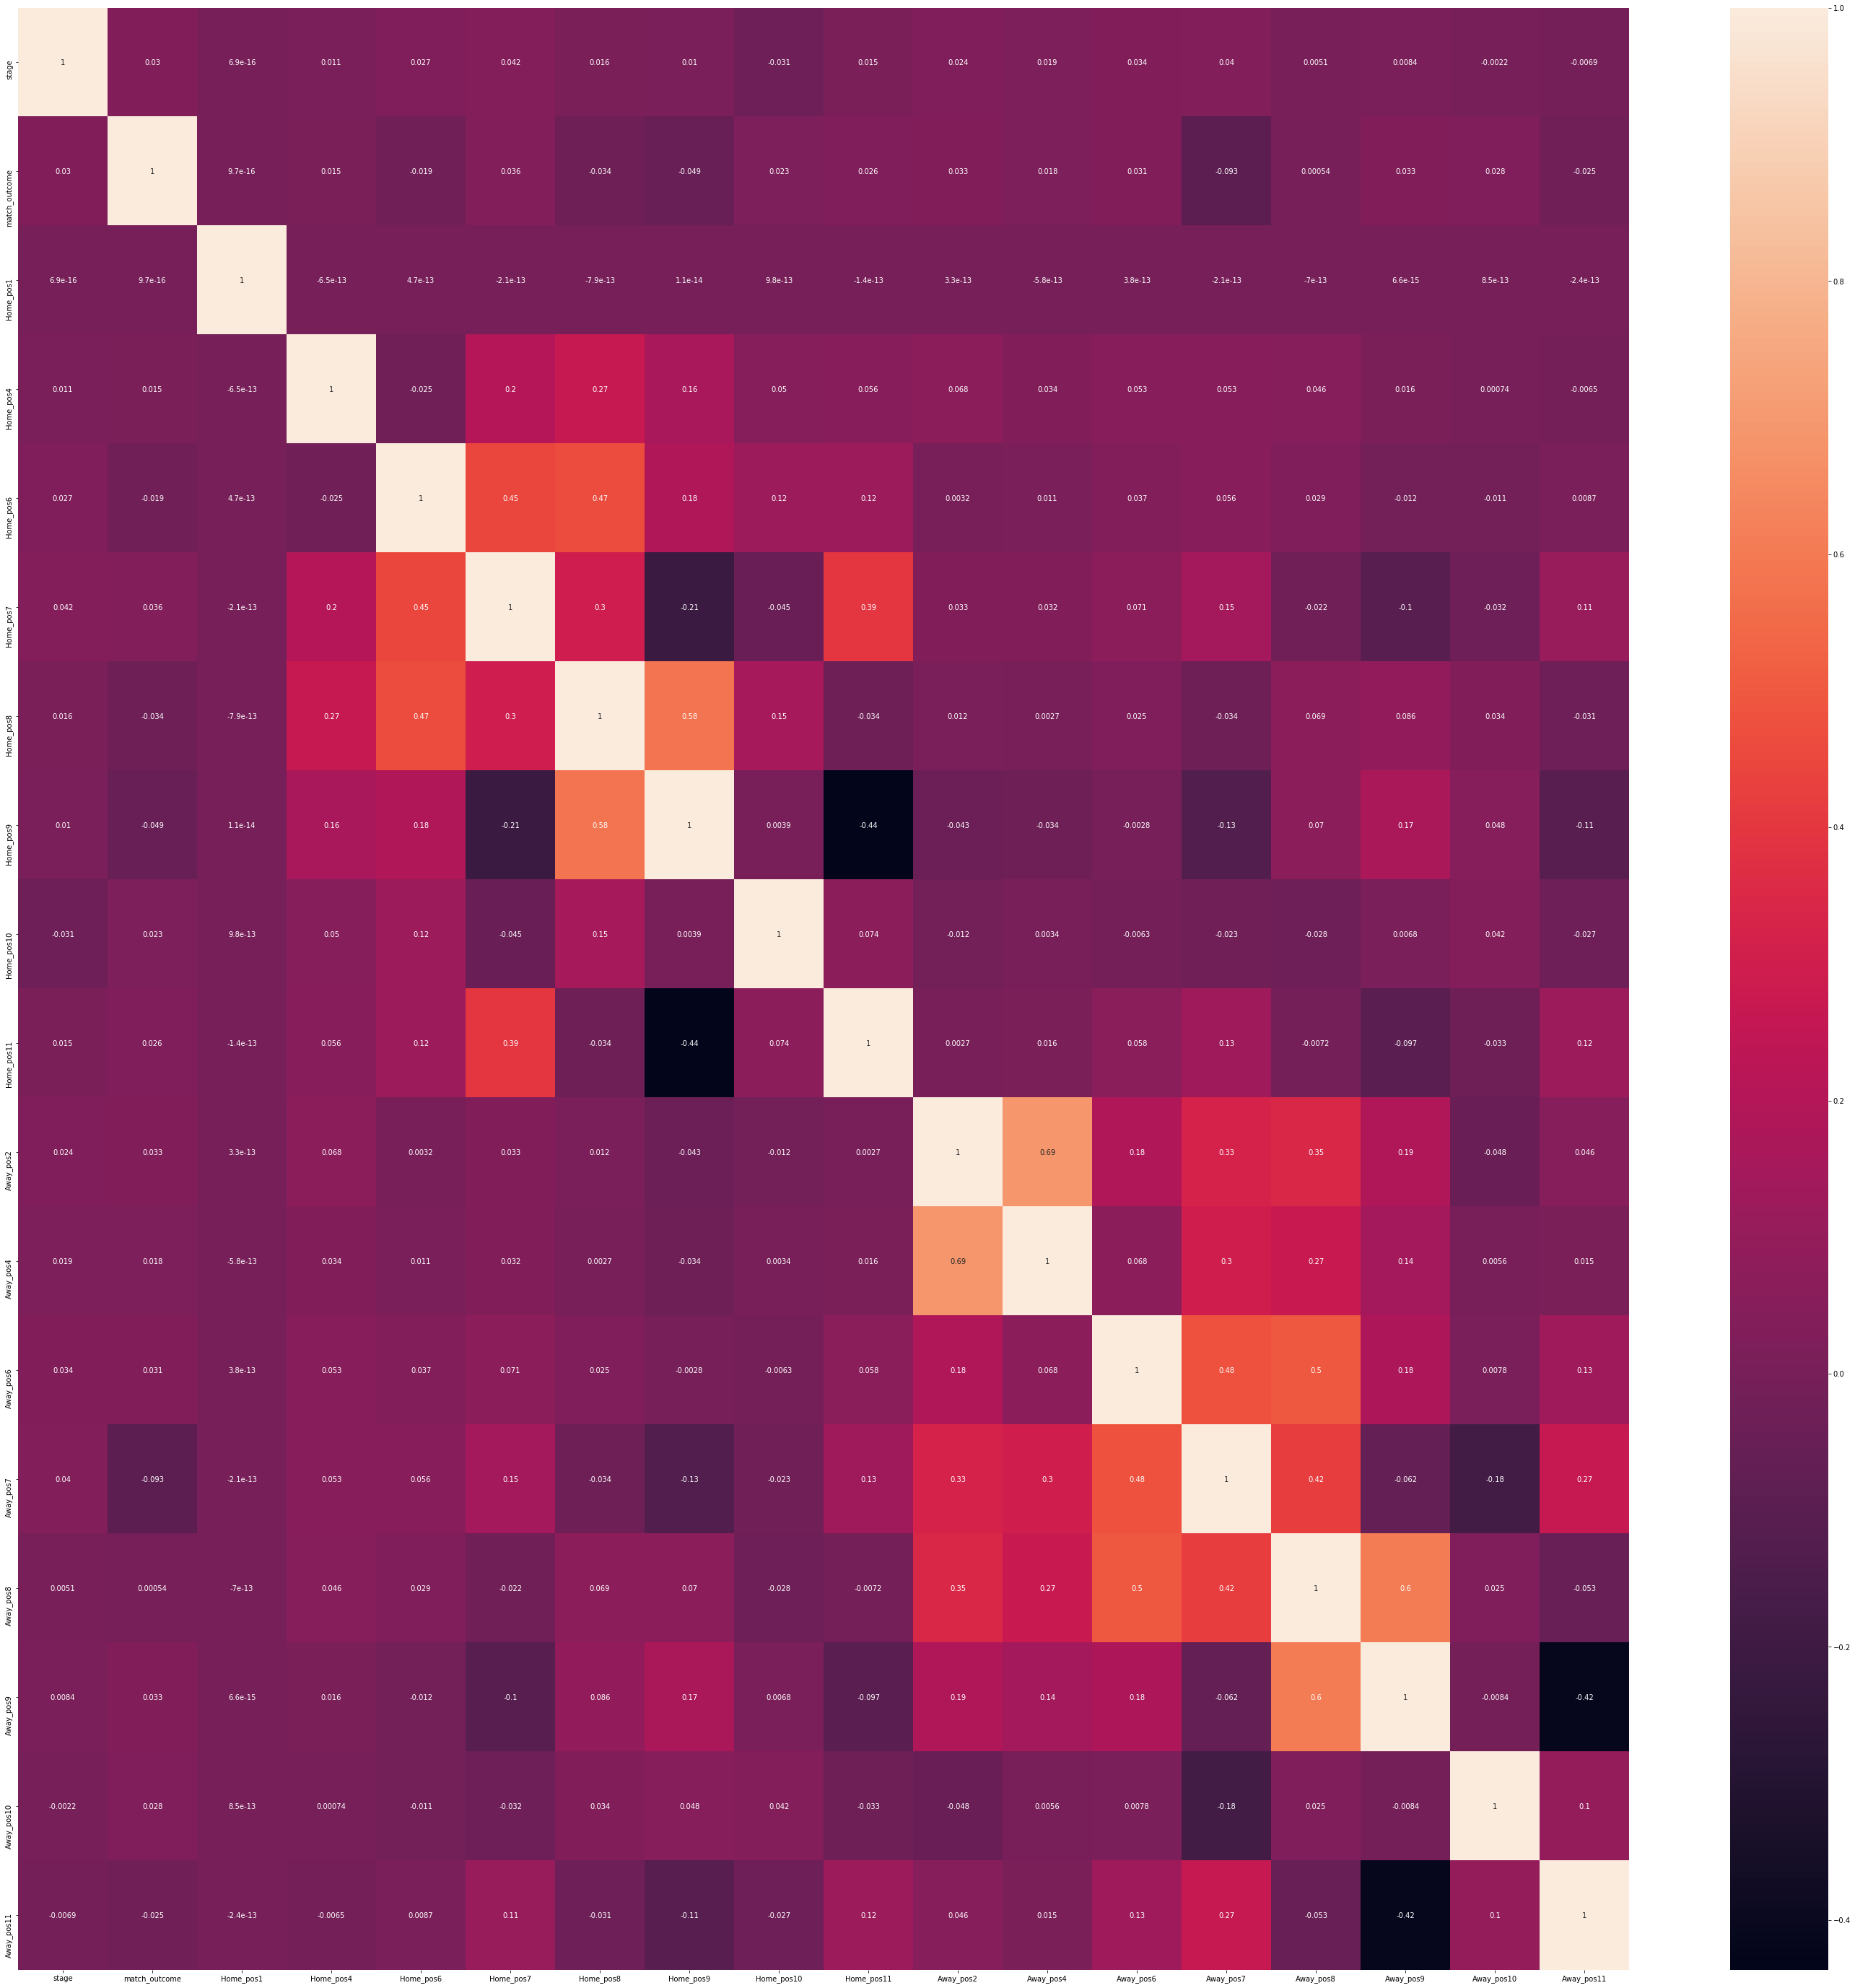

In [110]:
from pylab import savefig

fig, ax = plt.subplots(figsize=(50,50))         # Sample figsize in inches


corrplot=sn.heatmap(train1.corr(),annot = True,ax=ax)
figure = corrplot.get_figure()    
train1.corr().to_csv("corr.csv")

In [75]:
 def lambdaFunc2(x):
        if (x["match_outcome"] == 'win'):
            return 2
        elif (x["match_outcome"] == "draw"):
            return 1
        else:
            return 0
train1["match_outcome"] = train.apply(lambdaFunc2, axis = 1)        

In [79]:
train1=train1.drop(["Away_pos1","Away_pos3","Away_pos5","Home_pos2","Home_pos3","Home_pos5"],axis=1)
test1=test1.drop(["Away_pos1","Away_pos3","Away_pos5","Home_pos2","Home_pos3","Home_pos5"],axis=1)

In [80]:
train1.columns

Index(['stage', 'match_outcome', 'home_team_rank', 'away_team_rank',
       'home_player1_rank', 'home_player2_rank', 'home_player3_rank',
       'home_player4_rank', 'home_player5_rank', 'home_player6_rank',
       'home_player7_rank', 'home_player8_rank', 'home_player9_rank',
       'home_player10_rank', 'home_player11_rank', 'away_player1_rank',
       'away_player2_rank', 'away_player3_rank', 'away_player4_rank',
       'away_player5_rank', 'away_player6_rank', 'away_player7_rank',
       'away_player8_rank', 'away_player9_rank', 'away_player10_rank',
       'away_player11_rank', 'Home_pos1', 'Home_pos4', 'Home_pos6',
       'Home_pos7', 'Home_pos8', 'Home_pos9', 'Home_pos10', 'Home_pos11',
       'Away_pos2', 'Away_pos4', 'Away_pos6', 'Away_pos7', 'Away_pos8',
       'Away_pos9', 'Away_pos10', 'Away_pos11'],
      dtype='object')

In [83]:
test1.columns

Index(['stage', 'home_team_rank', 'away_team_rank', 'home_player1_rank',
       'home_player2_rank', 'home_player3_rank', 'home_player4_rank',
       'home_player5_rank', 'home_player6_rank', 'home_player7_rank',
       'home_player8_rank', 'home_player9_rank', 'home_player10_rank',
       'home_player11_rank', 'away_player1_rank', 'away_player2_rank',
       'away_player3_rank', 'away_player4_rank', 'away_player5_rank',
       'away_player6_rank', 'away_player7_rank', 'away_player8_rank',
       'away_player9_rank', 'away_player10_rank', 'away_player11_rank',
       'Home_pos1', 'Home_pos4', 'Home_pos6', 'Home_pos7', 'Home_pos8',
       'Home_pos9', 'Home_pos10', 'Home_pos11', 'Away_pos2', 'Away_pos4',
       'Away_pos6', 'Away_pos7', 'Away_pos8', 'Away_pos9', 'Away_pos10',
       'Away_pos11'],
      dtype='object')

In [82]:
test1=test1.drop(['home_team_id', 'away_team_id', 'team_id_x','team_id_y', 'away_team_ratings','home_team_ratings'],axis=1)

In [84]:
train1

,stage,match_outcome,home_team_rank,away_team_rank,home_player1_rank,home_player2_rank,home_player3_rank,home_player4_rank,home_player5_rank,home_player6_rank,...,Home_pos10,Home_pos11,Away_pos2,Away_pos4,Away_pos6,Away_pos7,Away_pos8,Away_pos9,Away_pos10,Away_pos11
0,1,1,1,1,10,7,5,5,1,1,...,10.770330,11.661904,3.605551,6.708204,7.280110,8.062258,9.219544,10.630146,10.295630,12.083046
1,1,2,2,2,10,1,6,7,2,1,...,10.770330,11.661904,3.605551,6.708204,8.602325,9.899495,11.401754,7.071068,7.615773,12.083046
2,1,0,2,1,10,5,9,9,4,3,...,10.770330,11.661904,3.605551,6.708204,7.280110,8.062258,9.219544,10.630146,10.770330,11.661904
3,1,2,1,4,10,1,9,10,6,3,...,10.770330,11.661904,3.605551,8.544004,7.280110,8.062258,9.219544,10.630146,10.770330,11.661904
5,1,0,1,2,10,3,5,3,9,1,...,11.401754,12.083046,3.605551,6.708204,8.062258,9.219544,10.630146,7.280110,11.661904,10.770330
6,1,2,4,2,10,8,9,5,8,6,...,10.770330,11.661904,3.605551,6.708204,7.280110,8.062258,9.219544,10.630146,10.770330,11.661904
7,1,2,2,1,10,3,3,9,5,5,...,11.401754,12.083046,3.605551,6.708204,7.280110,8.062258,9.219544,10.630146,10.770330,11.661904
8,1,2,3,3,10,5,9,9,7,6,...,10.770330,11.661904,3.605551,6.708204,7.280110,8.062258,9.219544,10.630146,10.770330,11.661904
9,1,2,1,3,10,2,6,3,1,1,...,10.000000,12.083046,3.605551,6.708204,7.280110,8.062258,9.219544,10.630146,10.770330,11.661904
10,10,2,1,1,10,3,5,5,1,1,...,10.770330,11.661904,3.605551,6.708204,7.615773,8.602325,9.899495,10.440307,11.180340,12.206556


In [85]:
y

NameError: name 'y' is not defined

In [121]:

y= train1.iloc[:,1]

X=train1.drop("match_outcome",axis=1)

In [122]:
train1.isna().sum()

stage                 0
match_outcome         0
home_team_rank        0
away_team_rank        0
home_player1_rank     0
home_player2_rank     0
home_player3_rank     0
home_player4_rank     0
home_player5_rank     0
home_player6_rank     0
home_player7_rank     0
home_player8_rank     0
home_player9_rank     0
home_player10_rank    0
home_player11_rank    0
away_player1_rank     0
away_player2_rank     0
away_player3_rank     0
away_player4_rank     0
away_player5_rank     0
away_player6_rank     0
away_player7_rank     0
away_player8_rank     0
away_player9_rank     0
away_player10_rank    0
away_player11_rank    0
Home_pos1             0
Home_pos4             0
Home_pos6             0
Home_pos7             0
Home_pos8             0
Home_pos9             0
Home_pos10            0
Home_pos11            0
Away_pos2             0
Away_pos4             0
Away_pos6             0
Away_pos7             0
Away_pos8             0
Away_pos9             0
Away_pos10            0
Away_pos11      

In [123]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=pd.DataFrame(sc.fit_transform(X))

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.25, random_state = 0)


In [140]:
from sklearn.linear_model import LogisticRegression
classifier1=LogisticRegression(random_state=0)
classifier1.fit(X_train,y_train)

LogisticRegression(random_state=0)

# logistic Regression

In [141]:
y_pred=classifier1.predict(X_test)

In [142]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[ 82   0  89]
 [ 49   0 133]
 [ 49   1 244]]


In [143]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
print(f1_score(y_test, y_pred,average="macro"))
print(precision_score(y_test, y_pred,average="macro"))
print(recall_score(y_test, y_pred,average="macro"))  
print(accuracy_score(y_test, y_pred))  


0.36978057679812065
0.32638690192338266
0.4364880455106019
0.5038639876352395


# Decision Tree

In [144]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [145]:
y_pred2=classifier2.predict(X_test)

In [146]:
accuracy_score(y_test,y_pred2)

0.3848531684698609

In [147]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
print(f1_score(y_test, y_pred2, average="macro"))
print(precision_score(y_test, y_pred2, average="macro"))
print(recall_score(y_test, y_pred2, average="macro"))  

0.3600102023909695
0.3603554366911788
0.36042181154963115


# Random Forest

In [148]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
classifier3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

In [149]:
y_pred3=classifier3.predict(X_test)

In [150]:
accuracy_score(y_test,y_pred3)

0.4868624420401855

In [151]:
print(f1_score(y_test, y_pred3, average="macro"))
print(precision_score(y_test, y_pred3, average="macro"))
print(recall_score(y_test, y_pred3, average="macro"))  

0.4141209347807934
0.429885689834342
0.43050391546632144


# Gaussian

In [152]:
from sklearn.naive_bayes import GaussianNB
classifier4=GaussianNB()
classifier4.fit(X_train,y_train)

GaussianNB()

In [153]:
y_pred4=classifier4.predict(X_test)

In [154]:
print(accuracy_score(y_test,y_pred4))
print(f1_score(y_test, y_pred4, average="macro"))
print(precision_score(y_test, y_pred4, average="macro"))
print(recall_score(y_test, y_pred4, average="macro")) 

0.4760432766615147
0.43955624887864486
0.43817618880710363
0.4433994020460186


# GradBoost

In [155]:
from sklearn.ensemble import GradientBoostingClassifier
classifier5 = GradientBoostingClassifier()
classifier5.fit(X_train, y_train)

GradientBoostingClassifier()

In [156]:
y_pred5=classifier5.predict(X_test)

In [157]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred5)
print(cm)

[[ 83  15  73]
 [ 52  15 115]
 [ 44  18 232]]


In [158]:
accuracy_score(y_test,y_pred5)
print(accuracy_score(y_test,y_pred5))
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
print(f1_score(y_test, y_pred5, average="macro"))
print(precision_score(y_test, y_pred5, average="macro"))
print(recall_score(y_test, y_pred5, average="macro"))  

0.5100463678516228
0.418193480290667
0.4428560344063137
0.45230444854505003


In [111]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs=SFS( GradientBoostingClassifier(),
        k_features=15,
        forward = True,
        floating= False,
        verbose=2,
        scoring='accuracy',
        cv=3,
        n_jobs=-1
       ).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:   29.6s finished

[2021-02-25 17:01:57] Features: 1/15 -- score: 0.4845201238390093[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   24.9s finished

[2021-02-25 17:02:23] Features: 2/15 -- score: 0.5020639834881321[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:   26.6s finished

[2021-02-25 17:02:49] Features: 3/15 -- score: 0.5072239422084622[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:   27.8s finished

[2021-02-25 17:03:17] Features: 4/15 -- score: 0.5175438596491229[Parallel(n_jobs=-1)]: U

In [112]:
sfs.k_feature_names_

('2',
 '3',
 '7',
 '9',
 '13',
 '14',
 '18',
 '20',
 '23',
 '24',
 '25',
 '26',
 '31',
 '33',
 '37')

In [114]:
train1

Index(['stage', 'match_outcome', 'home_team_rank', 'away_team_rank',
       'home_player1_rank', 'home_player2_rank', 'home_player3_rank',
       'home_player4_rank', 'home_player5_rank', 'home_player6_rank',
       'home_player7_rank', 'home_player8_rank', 'home_player9_rank',
       'home_player10_rank', 'home_player11_rank', 'away_player1_rank',
       'away_player2_rank', 'away_player3_rank', 'away_player4_rank',
       'away_player5_rank', 'away_player6_rank', 'away_player7_rank',
       'away_player8_rank', 'away_player9_rank', 'away_player10_rank',
       'away_player11_rank', 'Home_pos1', 'Home_pos4', 'Home_pos6',
       'Home_pos7', 'Home_pos8', 'Home_pos9', 'Home_pos10', 'Home_pos11',
       'Away_pos2', 'Away_pos4', 'Away_pos6', 'Away_pos7', 'Away_pos8',
       'Away_pos9', 'Away_pos10', 'Away_pos11'],
      dtype='object')

In [138]:
#test1=test1.iloc[:,[2,3,7,9,13,14,18,20,23,24,25,26,31,33,37]]
X=X.iloc[:,[2,3,7,9,13,14,18,20,23,24,25,26,31,33,37]]

In [116]:
test1

,away_team_rank,home_player1_rank,home_player5_rank,home_player7_rank,home_player11_rank,away_player1_rank,away_player5_rank,away_player7_rank,away_player10_rank,away_player11_rank,Home_pos1,Home_pos4,Home_pos10,Away_pos2,Away_pos8
0,1,10,2,1,1,10,5,9,3,7,1.414214,6.708204,10.630146,3.605551,9.219544
1,1,10,8,3,8,10,6,5,5,1,1.414214,6.708204,10.770330,3.605551,9.899495
2,4,10,2,1,2,10,5,2,5,4,1.414214,6.708204,10.630146,3.605551,8.544004
3,4,10,9,2,1,10,3,1,3,9,1.414214,6.708204,10.630146,3.605551,8.544004
4,2,10,4,6,4,10,4,2,1,5,1.414214,7.615773,11.704700,3.605551,9.899495
5,2,10,5,3,1,10,5,4,2,3,1.414214,6.708204,10.630146,3.605551,8.544004
6,3,10,6,3,2,10,9,3,4,5,1.414214,6.708204,10.630146,3.605551,8.544004
7,2,10,4,2,8,10,5,1,3,8,1.414214,6.708204,11.401754,3.605551,9.219544
8,1,10,6,2,4,10,9,1,2,2,1.414214,6.708204,10.630146,3.605551,8.485281
9,1,10,8,3,7,10,1,1,2,2,1.414214,6.708204,10.770330,3.605551,8.544004


In [159]:
test1["predictions"]= classifier5.predict(test1)
test1

,away_team_rank,home_player1_rank,home_player5_rank,home_player7_rank,home_player11_rank,away_player1_rank,away_player5_rank,away_player7_rank,away_player10_rank,away_player11_rank,Home_pos1,Home_pos4,Home_pos10,Away_pos2,Away_pos8,predictions
0,1,10,2,1,1,10,5,9,3,7,1.414214,6.708204,10.630146,3.605551,9.219544,0
1,1,10,8,3,8,10,6,5,5,1,1.414214,6.708204,10.770330,3.605551,9.899495,1
2,4,10,2,1,2,10,5,2,5,4,1.414214,6.708204,10.630146,3.605551,8.544004,1
3,4,10,9,2,1,10,3,1,3,9,1.414214,6.708204,10.630146,3.605551,8.544004,0
4,2,10,4,6,4,10,4,2,1,5,1.414214,7.615773,11.704700,3.605551,9.899495,2
5,2,10,5,3,1,10,5,4,2,3,1.414214,6.708204,10.630146,3.605551,8.544004,1
6,3,10,6,3,2,10,9,3,4,5,1.414214,6.708204,10.630146,3.605551,8.544004,1
7,2,10,4,2,8,10,5,1,3,8,1.414214,6.708204,11.401754,3.605551,9.219544,1
8,1,10,6,2,4,10,9,1,2,2,1.414214,6.708204,10.630146,3.605551,8.485281,2
9,1,10,8,3,7,10,1,1,2,2,1.414214,6.708204,10.770330,3.605551,8.544004,2


In [162]:
submit= pd.read_csv("prediction_submission.csv")
submit

,match_id,result


In [163]:
submit['match_id']=test.match_id
submit['result']=test1.predictions
submit

,match_id,result
0,48994,0
1,54777,1
2,31434,1
3,56248,0
4,44311,2
5,49672,1
6,48506,1
7,45922,1
8,45509,2
9,48741,2


In [165]:
submit.to_csv("Predictions.csv")